In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
from IPython.display import display
import matplotlib.dates as mdates

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_1 = '/content/drive/MyDrive/TSLA.csv'

In [ ]:
path_2 = '/content/drive/MyDrive/forecast_df.csv'

In [ ]:
path_3 = '/content/drive/MyDrive/sarima_forecast.csv'

In [ ]:
path_4 = '/content/drive/MyDrive/test_predictions.csv'

In [ ]:
path_5 = '/content/drive/MyDrive/predicted_values.csv'

In [ ]:
data = pd.read_csv(path_1)
start_date = '2015-01-01'
end_date = '2020-12-31'
data_1 = data[(data['Date']>= start_date) & (data['Date']<= end_date)]
df = data_1[['Date','Adj Close']]
df.set_index('Date', inplace=True)
df.head()

,Adj Close
Date,
2015-01-02,43.862000
2015-01-05,42.018002
2015-01-06,42.256001
2015-01-07,42.189999
2015-01-08,42.124001


In [ ]:
df_2 = pd.read_csv(path_2)
df_2.set_index('Date', inplace=True)
df_2.head()

,Adj Close
Date,
2020-06-01,167.417308
2020-06-02,168.115866
2020-06-03,167.228953
2020-06-04,168.042996
2020-06-05,167.592533


In [ ]:
df_3 = pd.read_csv(path_3)
df_3.set_index('Date', inplace=True)
df_3.head()



,Adj Close
Date,
2020-06-01,169.224467
2020-06-02,170.434982
2020-06-03,176.747368
2020-06-04,180.965404
2020-06-05,177.885380


In [ ]:
df_4 = pd.read_csv(path_4)
df_4.set_index('Date', inplace=True)
df_4.head()

,Predicted Adj Close
Date,
2019-07-01,44.836150
2019-07-02,44.320180
2019-07-03,46.360065
2019-07-05,46.005000
2019-07-08,45.460815


In [ ]:
df_5 = pd.read_csv(path_5)
df_5.set_index('Date', inplace=True)
df_5.head()

,Actual,Predicted
Date,,
2020-06-01,179.619995,175.62160
2020-06-02,176.311996,166.39734
2020-06-03,176.591995,169.25925
2020-06-04,172.876007,168.40189
2020-06-05,177.132004,169.90744


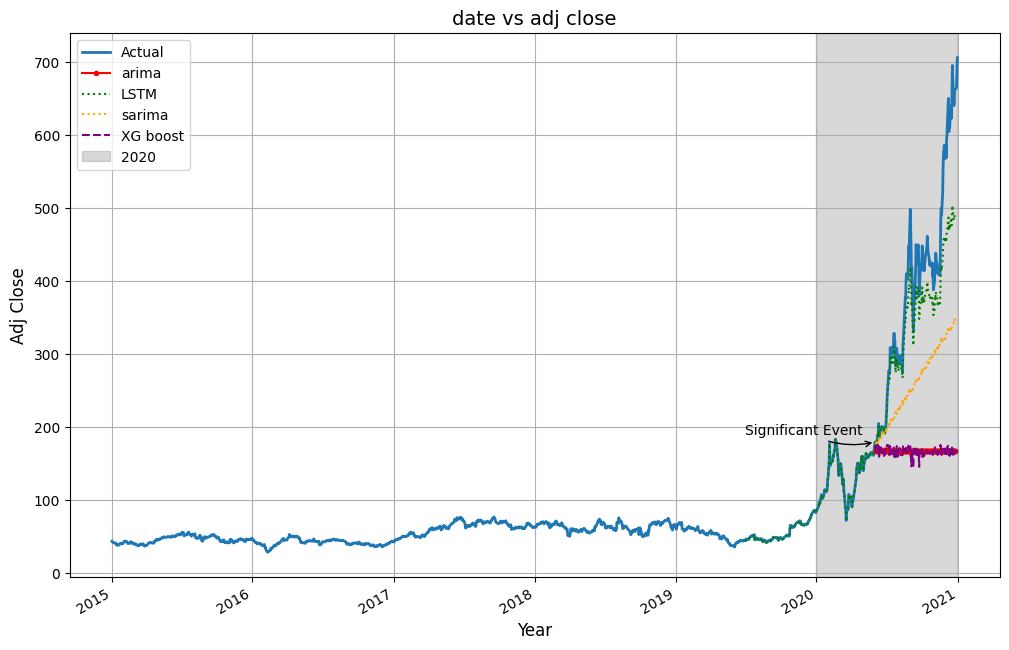

In [ ]:
plt.figure(figsize=(12, 8))


df.index = pd.to_datetime(df.index)
df_2.index = pd.to_datetime(df_2.index)
df_3.index = pd.to_datetime(df_3.index)
df_4.index = pd.to_datetime(df_4.index)
df_5.index = pd.to_datetime(df_5.index)

plt.plot(df.index, df['Adj Close'], label='Actual',linestyle = '-',linewidth = 2)
plt.plot(df_2.index, df_2['Adj Close'], color='red', label='arima',marker ='o',markersize = 3,)
plt.plot(df_4.index, df_4['Predicted Adj Close'], color='green', label='LSTM',linestyle = ':', linewidth=1.5 )
plt.plot(df_3.index, df_3['Adj Close'], color='orange', label='sarima',linestyle = ':', linewidth=1.5)
plt.plot(df_5.index, df_5['Predicted'], color='purple', label='XG boost',linestyle = '--', linewidth=1.5)

plt.axvspan('2020-01-01', '2020-12-31', color='gray', alpha=0.3, label='2020') #shaded region

annotation_date = pd.to_datetime('2020-06-01')

plt.annotate('Significant Event', xy=(annotation_date, df.loc[annotation_date, 'Adj Close']),
             xytext=(pd.to_datetime('2019-07-01'), df.loc[annotation_date, 'Adj Close'] + 10),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))  # annotate


plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate() # Formatting x-axis to show years with better spacing


plt.title('date vs adj close', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()